PRACTICAL LECTURE 4

PART1. Autoencoders

1. Import libraries

In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt

2. Convert vector to image
The following function allows to convert a vector to a image


In [ ]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

3. We now write a function wchi allows to display the images using the omshow() function.

In [ ]:
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

4. Define a data loading step and load the MNIST dataset

In [ ]:
batch_size = 256

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


5. Fix the used device

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

6. Define the Autoencoder model architecture and reconstruction loss
with : 
n = 28 x 28 = 784

A. Use d = 30  for standard AE (under-complete hidden layer)

B. Use d = 500 for denoising AE (over-complete hidden layer)

C. Explain the difference between standard AE and denoising AE.
Analyse the results and conclude.


denoising autoencoder, in addition to learning to compress data like an autoencoder, it learns to remove noise in images, which allows to perform well even when the inputs are noisy. So denoising autoencoders are more robust than autoencoders + they learn more features from the data than a standard autoencoder.

In [ ]:
dd=500;
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, dd),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(dd, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [ ]:
learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

epoch [1/20], loss:0.9074
epoch [2/20], loss:0.8432
epoch [3/20], loss:0.8135
epoch [4/20], loss:0.7964
epoch [5/20], loss:0.7877
epoch [6/20], loss:0.7692
epoch [7/20], loss:0.7537
epoch [8/20], loss:0.7457
epoch [9/20], loss:0.7296
epoch [10/20], loss:0.7162
epoch [11/20], loss:0.7047
epoch [12/20], loss:0.6924
epoch [13/20], loss:0.6821
epoch [14/20], loss:0.6768
epoch [15/20], loss:0.6711
epoch [16/20], loss:0.6706
epoch [17/20], loss:0.6671
epoch [18/20], loss:0.6654
epoch [19/20], loss:0.6683
epoch [20/20], loss:0.6624


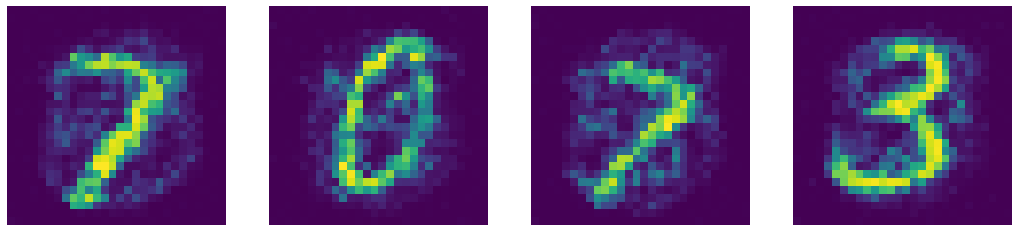

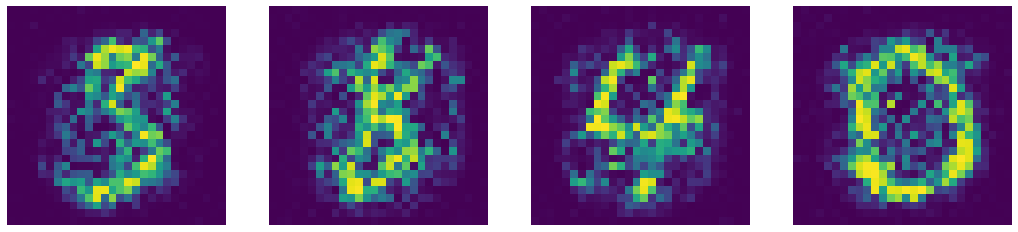

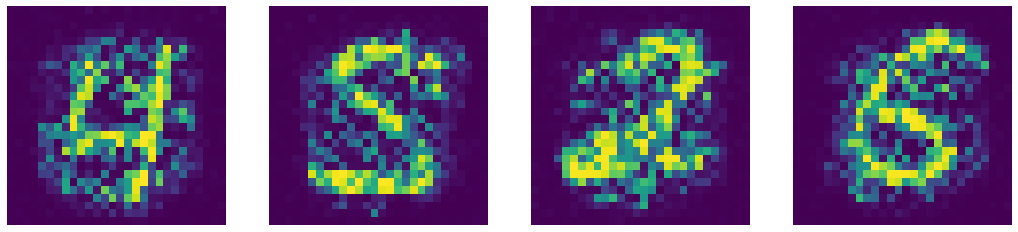

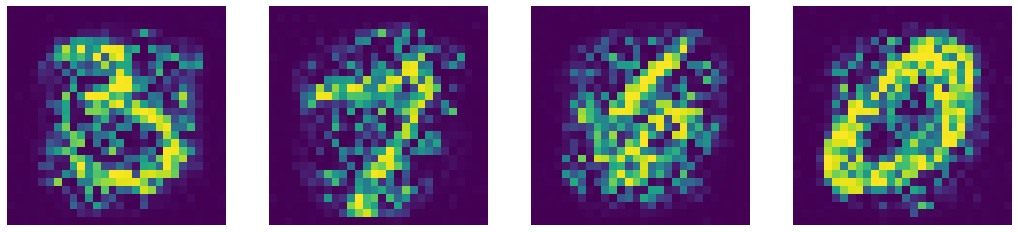

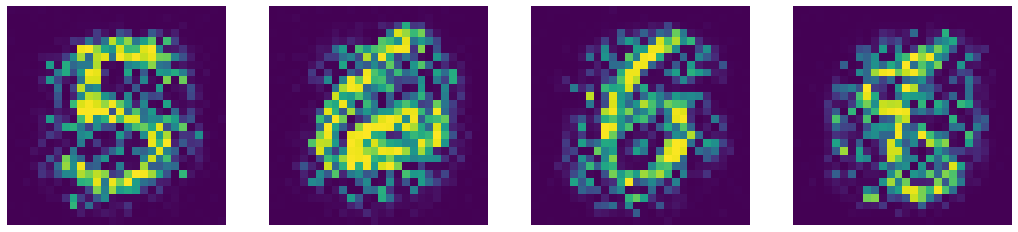

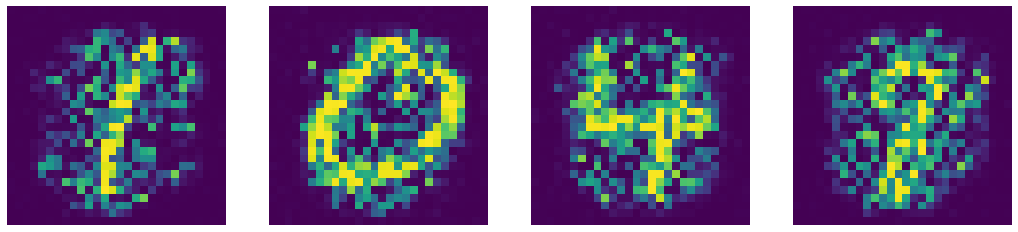

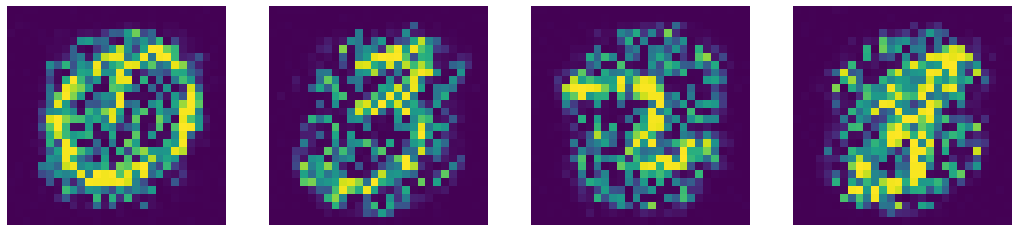

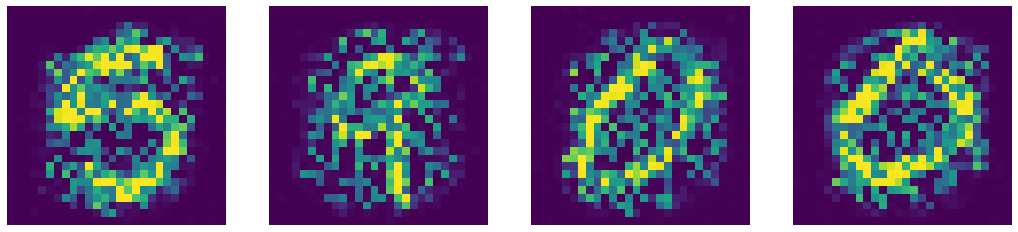

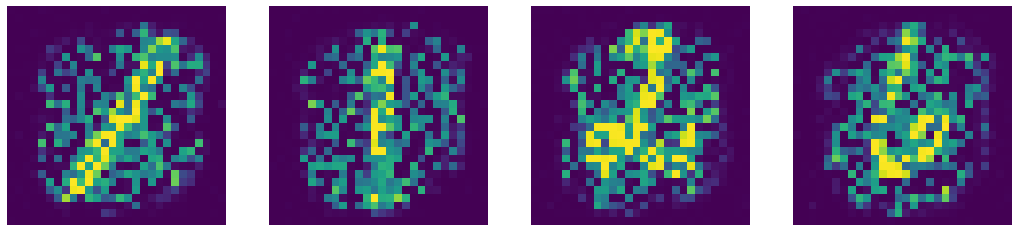

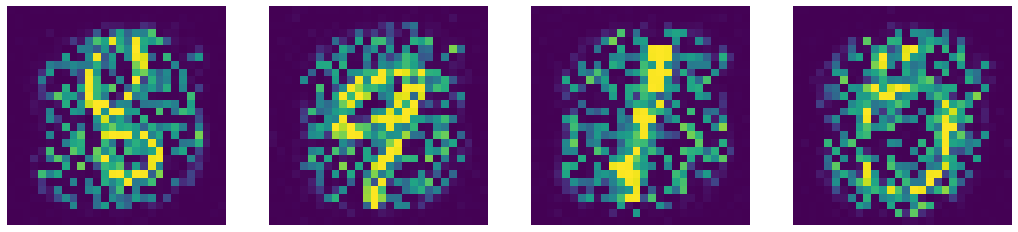

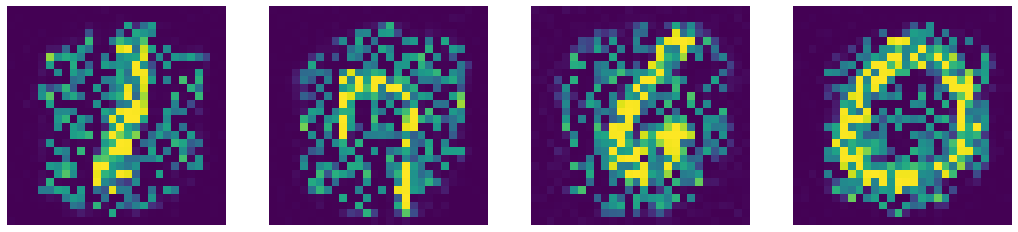

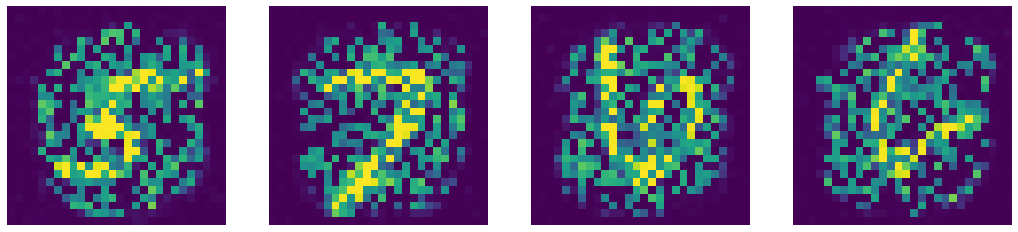

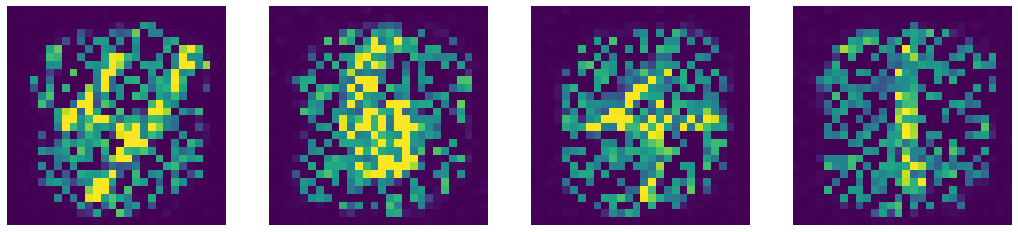

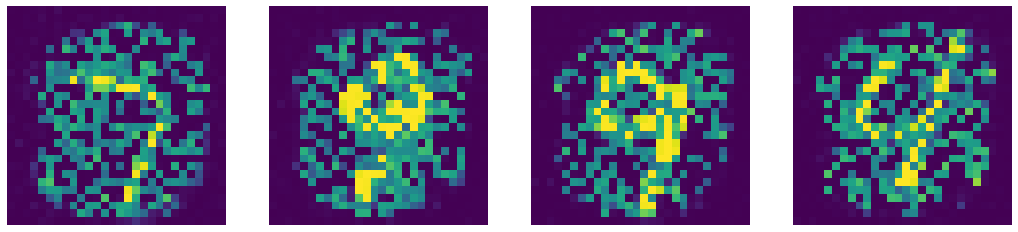

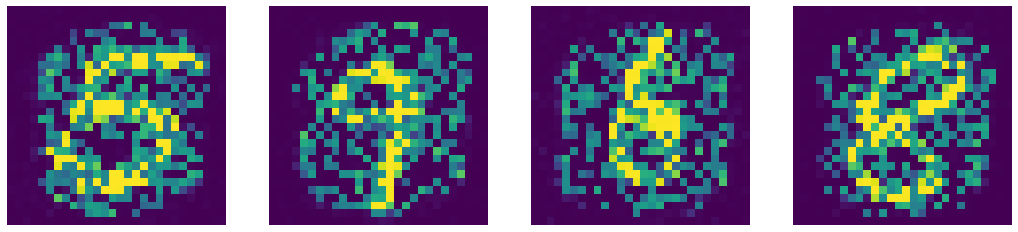

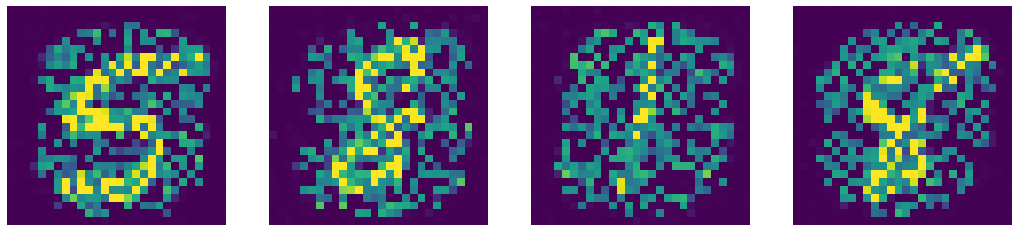

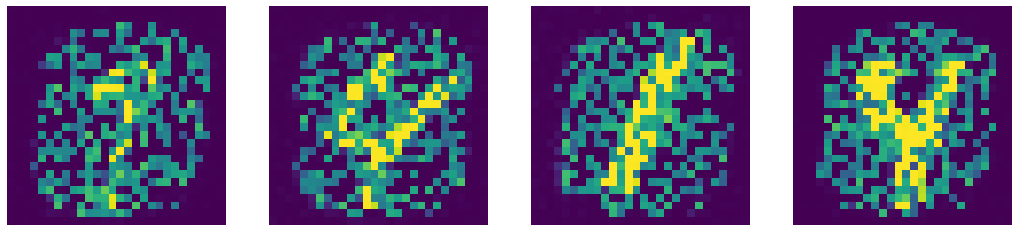

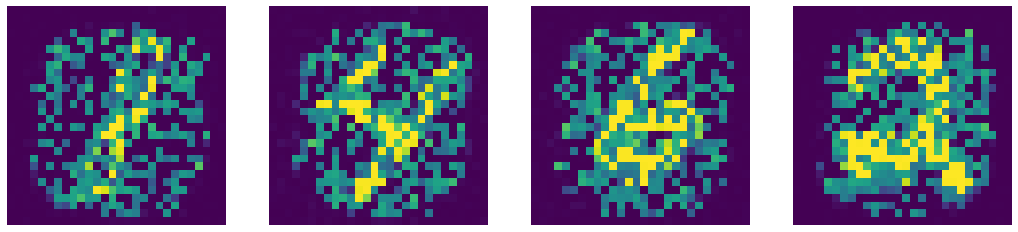

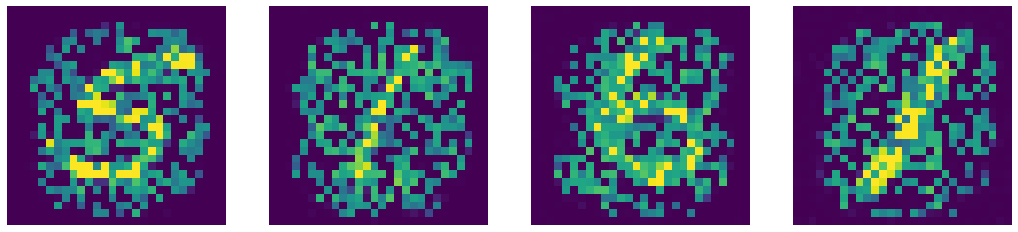

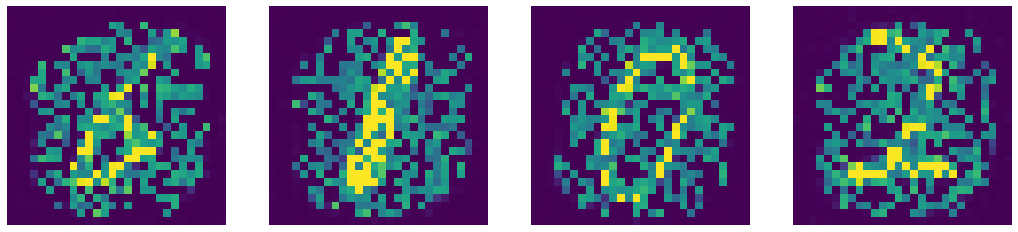

In [ ]:
## denoising autoencoder
num_epochs = 20
do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        noise = do(torch.ones(img.shape)).to(device)
        img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = model(img_bad)  # feed <img> (for std AE) or <img_bad> (for denoising AE)
        loss = criterion(output, img_bad.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

In [ ]:
## standard autoencoder
d=30;
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, d),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(d, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Autoencoder().to(device)
criterion = nn.MSELoss()

7. Configure the optimiser. We use here : learning_rate equals to 1e-3

In [ ]:


learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

8. Train the standard autoencoder and the denoising autoencoder using the following code :


epoch [1/20], loss:0.1945
epoch [2/20], loss:0.1523
epoch [3/20], loss:0.1220
epoch [4/20], loss:0.1057
epoch [5/20], loss:0.0951
epoch [6/20], loss:0.0875
epoch [7/20], loss:0.0905
epoch [8/20], loss:0.0835
epoch [9/20], loss:0.0714
epoch [10/20], loss:0.0731
epoch [11/20], loss:0.0719
epoch [12/20], loss:0.0627
epoch [13/20], loss:0.0697
epoch [14/20], loss:0.0680
epoch [15/20], loss:0.0696
epoch [16/20], loss:0.0617
epoch [17/20], loss:0.0591
epoch [18/20], loss:0.0619
epoch [19/20], loss:0.0625
epoch [20/20], loss:0.0517


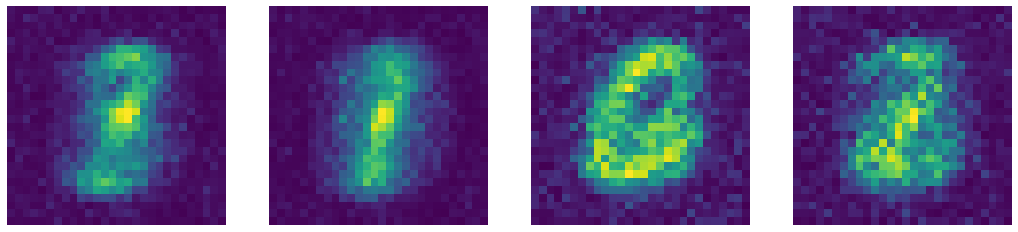

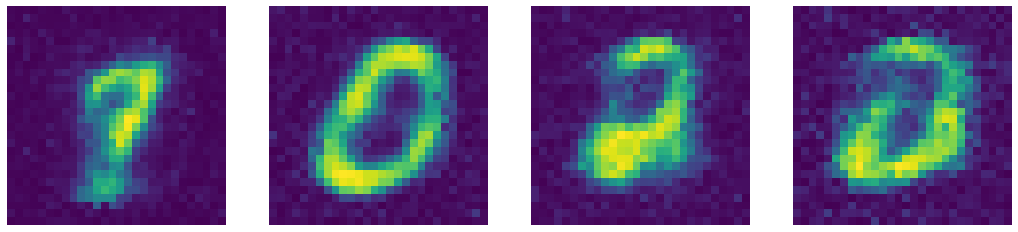

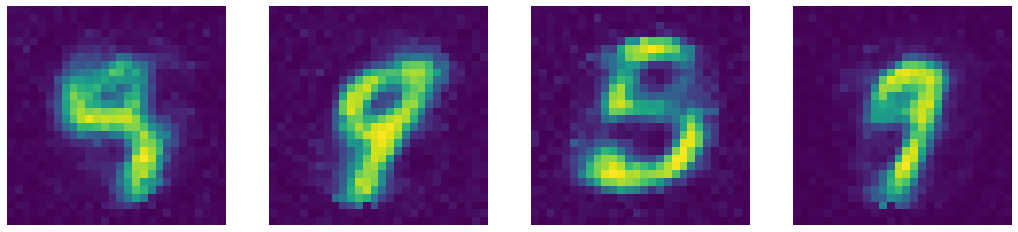

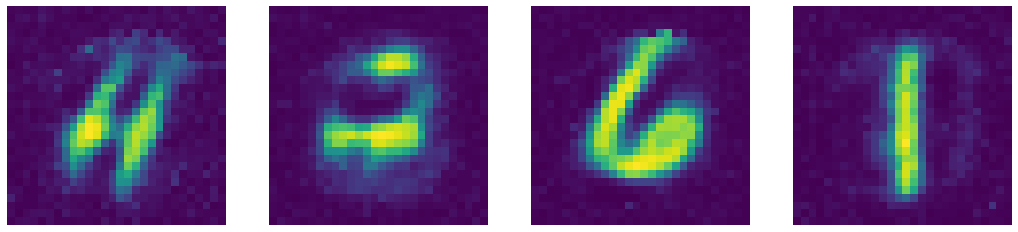

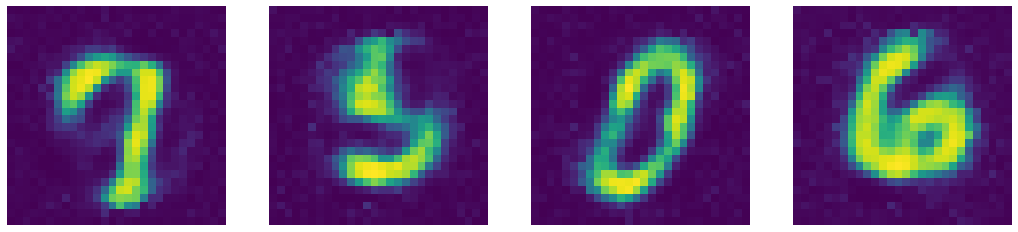

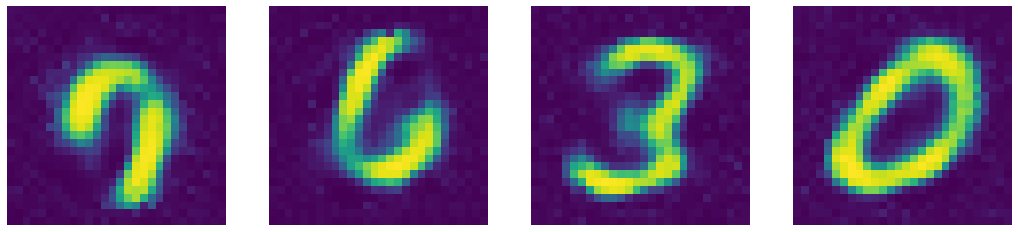

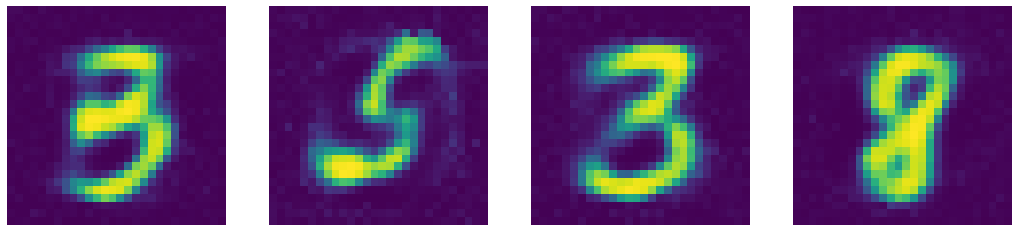

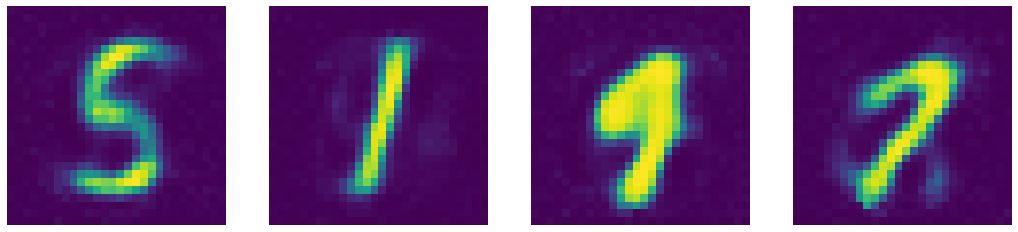

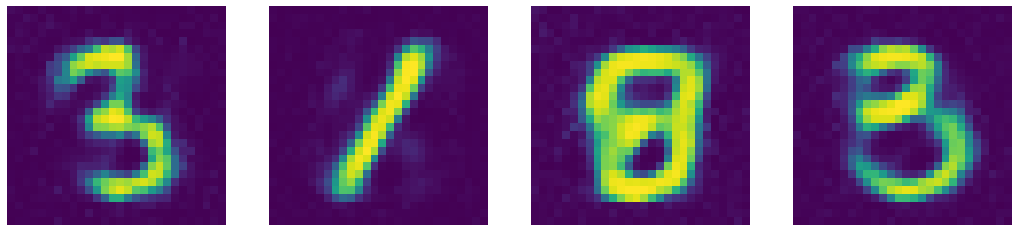

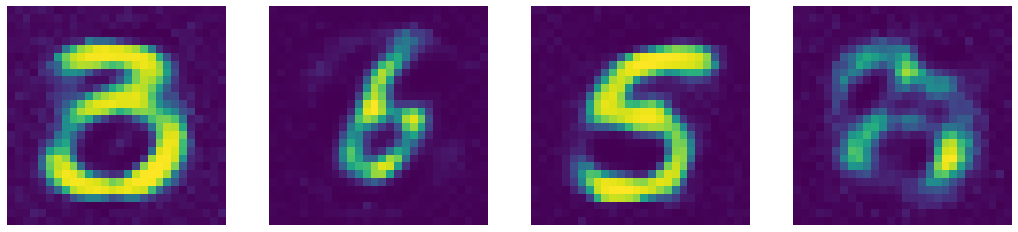

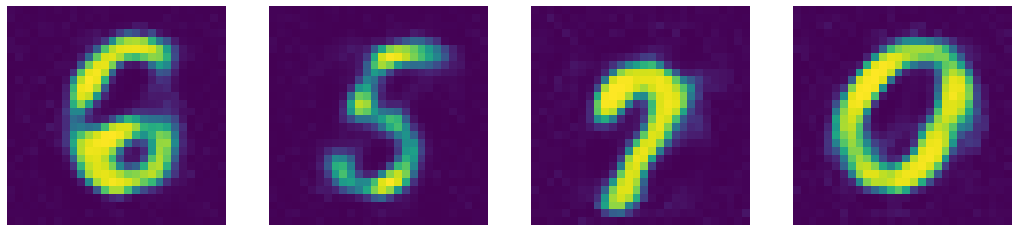

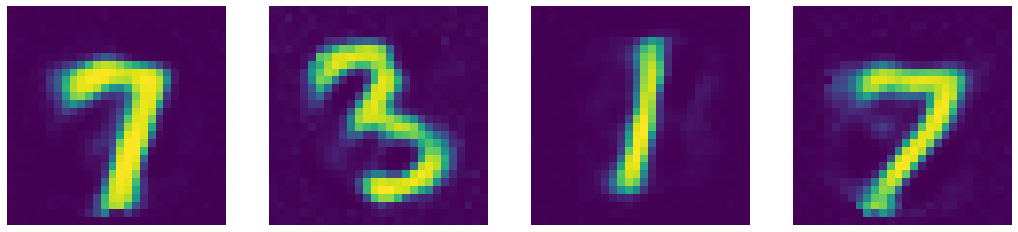

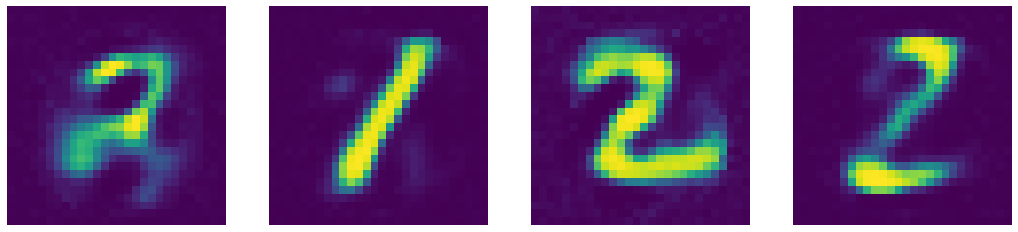

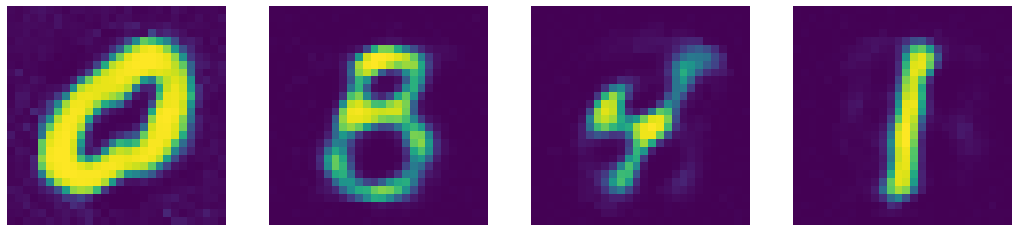

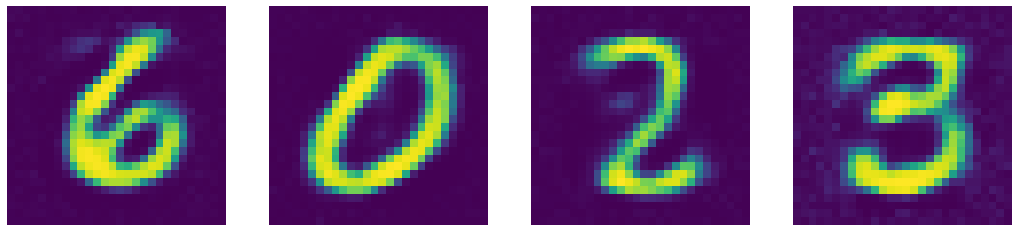

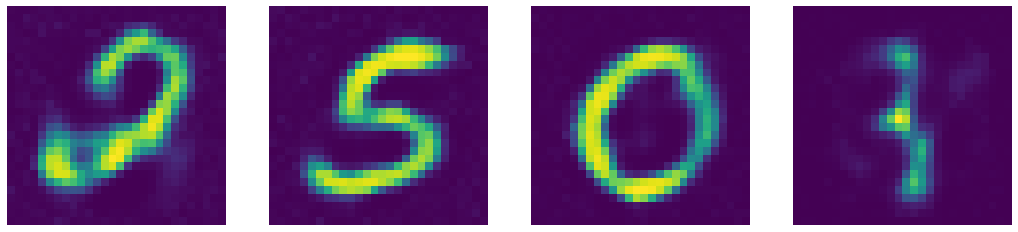

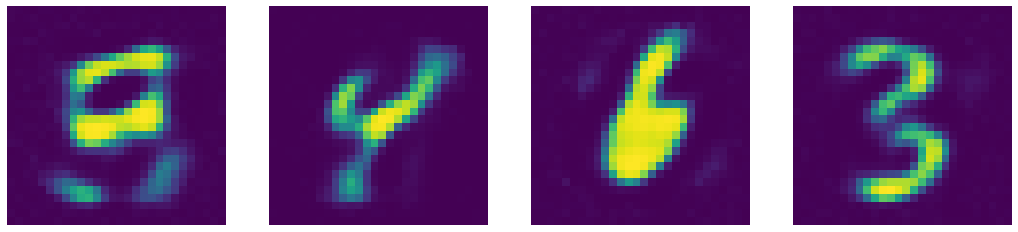

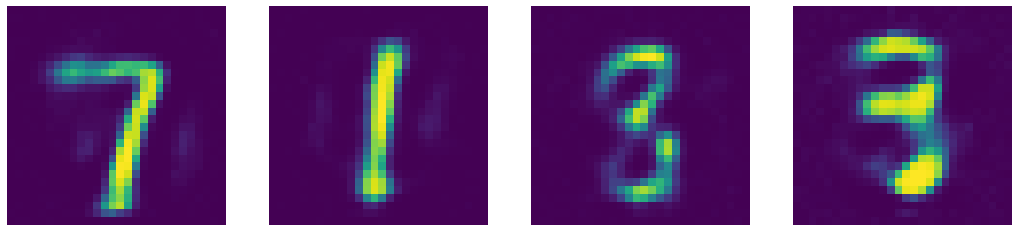

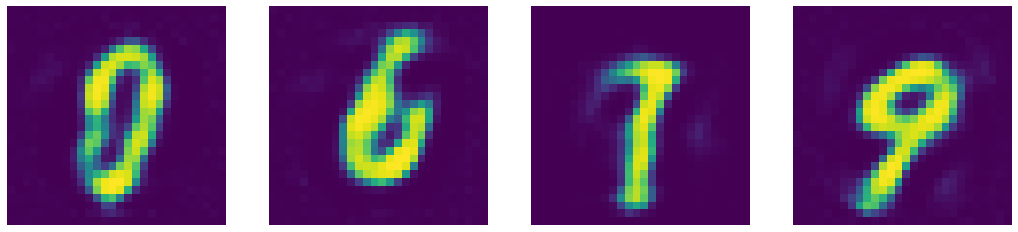

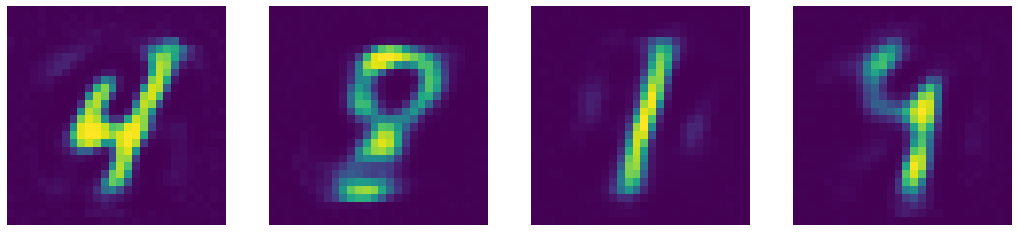

In [ ]:
num_epochs = 20
# do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        # noise = do(torch.ones(img.shape)).to(device)
        # img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = model(img)  # feed <img> (for std AE) or <img_bad> (for denoising AE)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

9. Visualise a few kernels of the encoder :


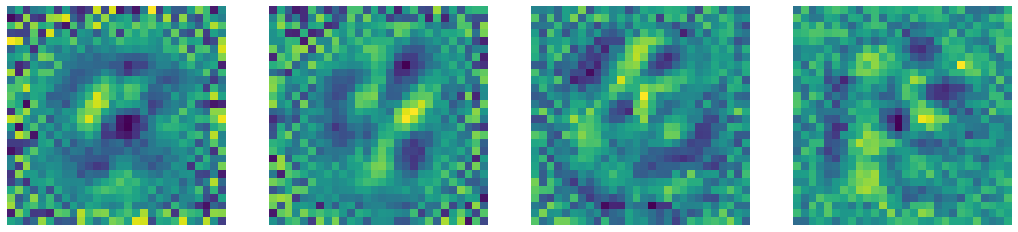

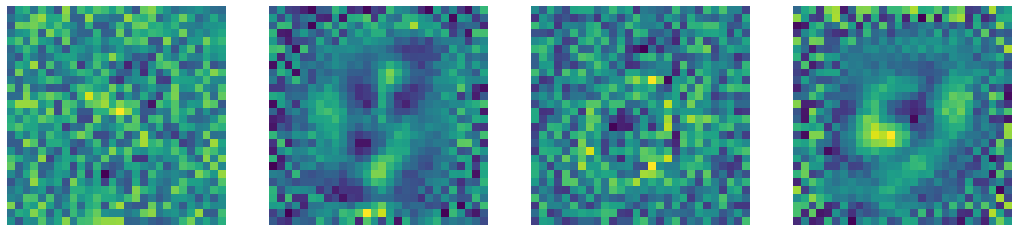

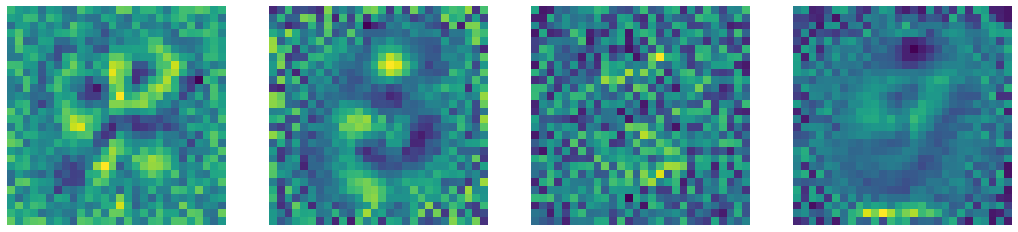

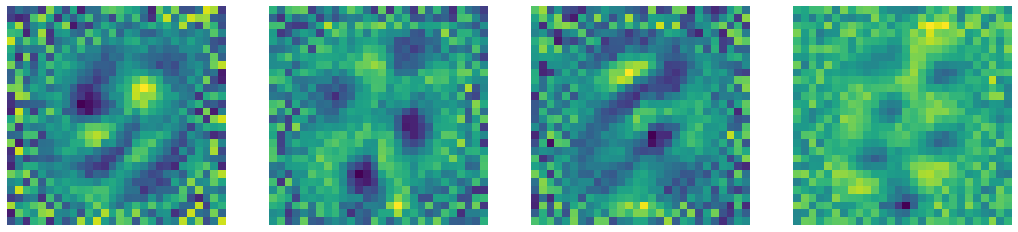

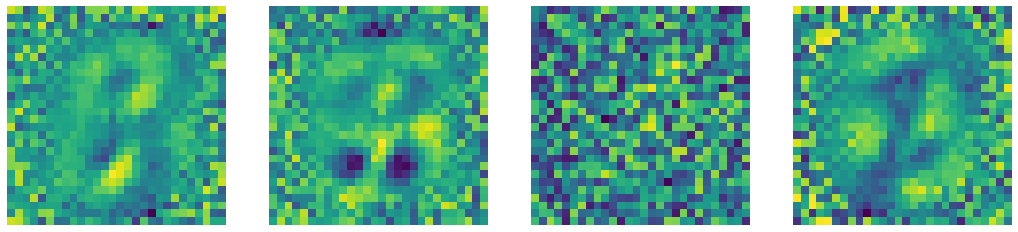

In [ ]:
display_images(None, model.encoder[0].weight, 5)

10. Analyse the obtained results.

11. Changes the parameters of the Autoencoder and analyse theirs impact. Conclude.

In [ ]:
d=30;

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 100),
            nn.Tanh(),
            nn.Linear(100 , d),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(d , 100),
            nn.Tanh(),
            nn.Linear(100, 28 * 28),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [ ]:
learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

epoch [1/20], loss:0.2134
epoch [2/20], loss:0.1510
epoch [3/20], loss:0.1203
epoch [4/20], loss:0.1016
epoch [5/20], loss:0.0800
epoch [6/20], loss:0.0757
epoch [7/20], loss:0.0668
epoch [8/20], loss:0.0590
epoch [9/20], loss:0.0581
epoch [10/20], loss:0.0594
epoch [11/20], loss:0.0479
epoch [12/20], loss:0.0565
epoch [13/20], loss:0.0510
epoch [14/20], loss:0.0450
epoch [15/20], loss:0.0443
epoch [16/20], loss:0.0479
epoch [17/20], loss:0.0411
epoch [18/20], loss:0.0430
epoch [19/20], loss:0.0396
epoch [20/20], loss:0.0427


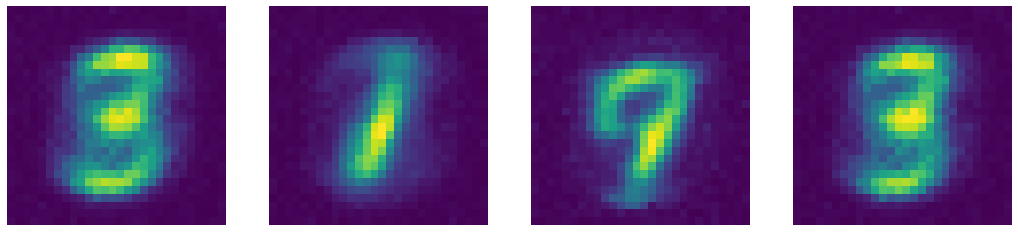

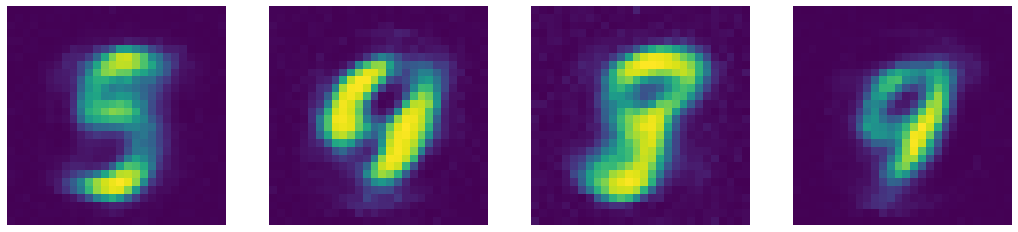

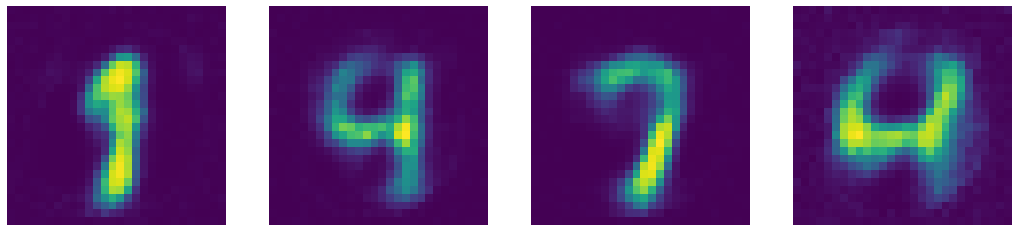

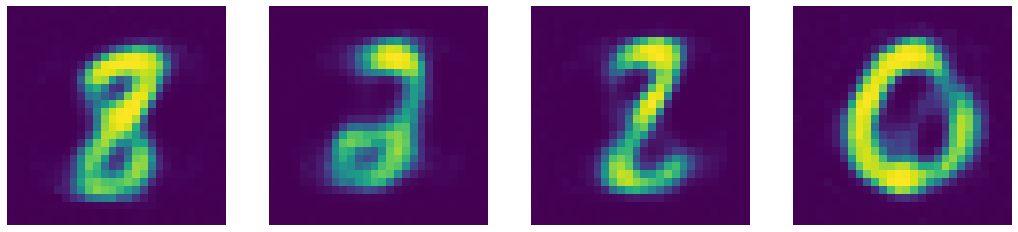

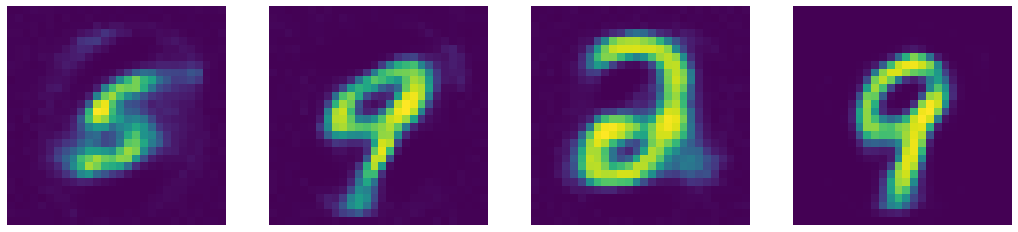

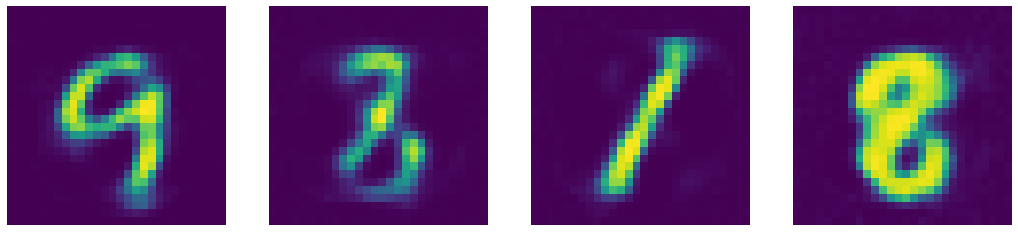

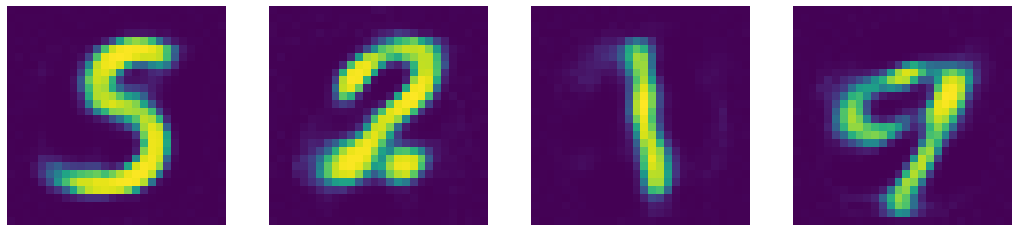

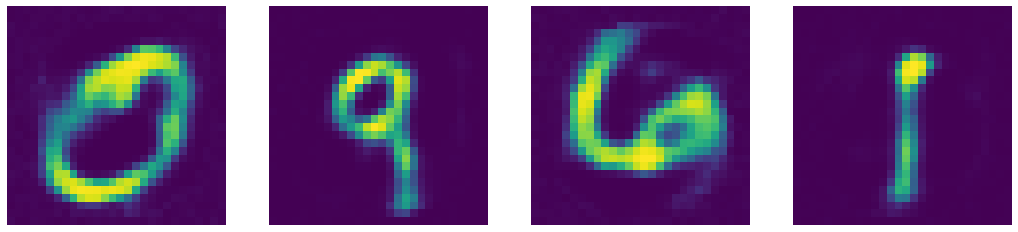

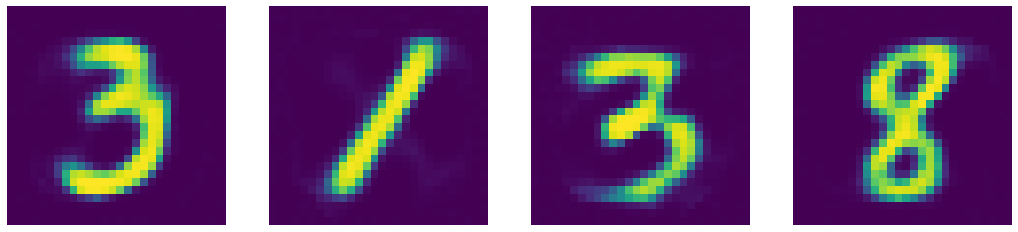

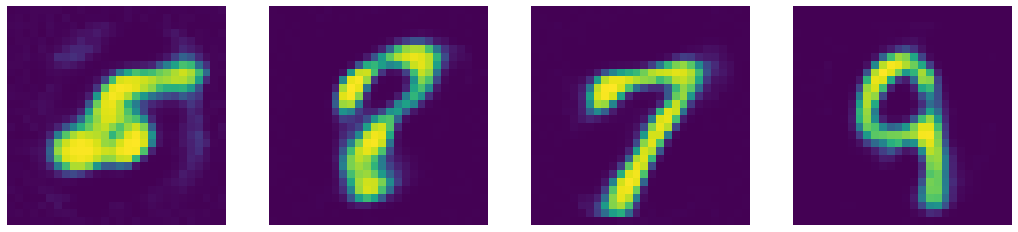

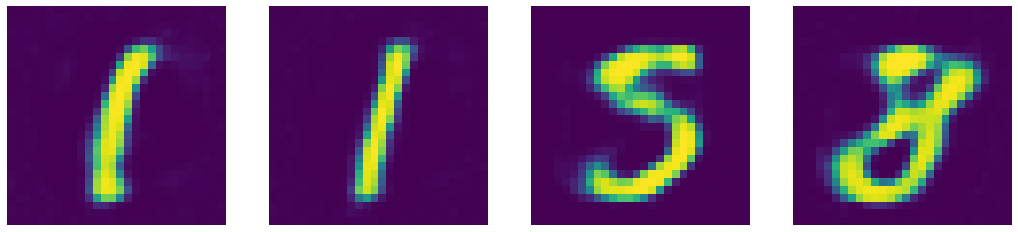

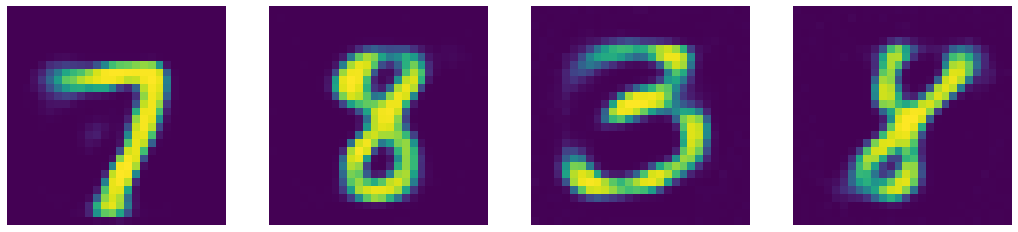

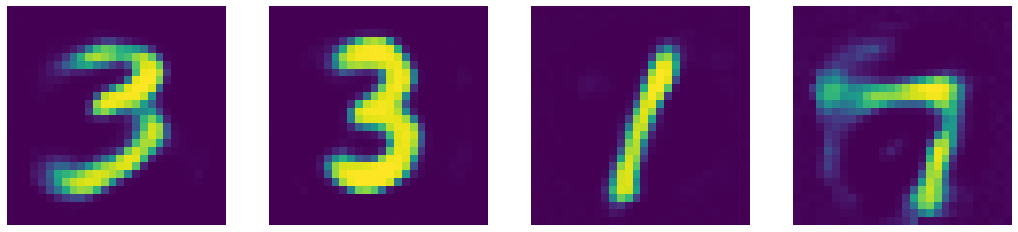

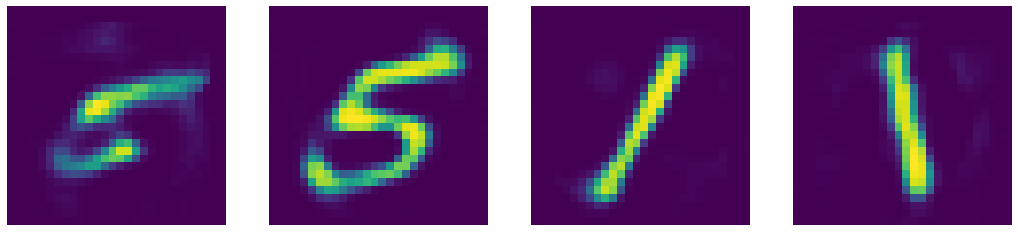

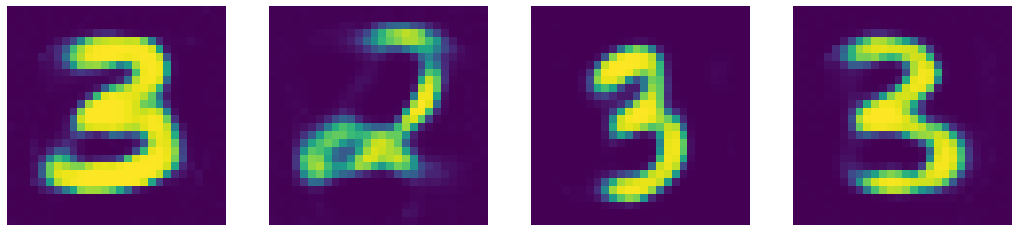

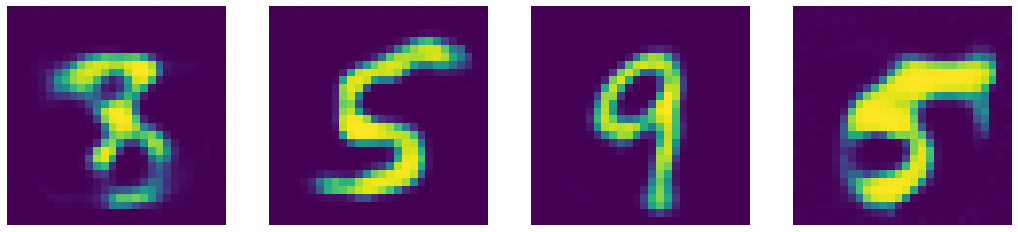

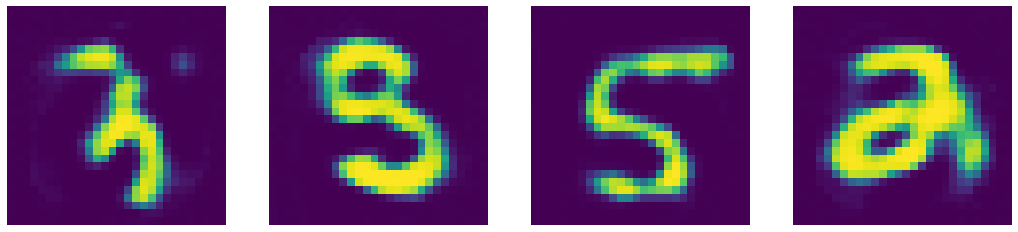

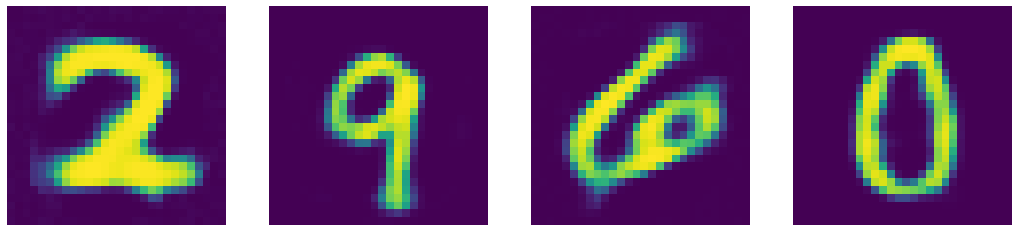

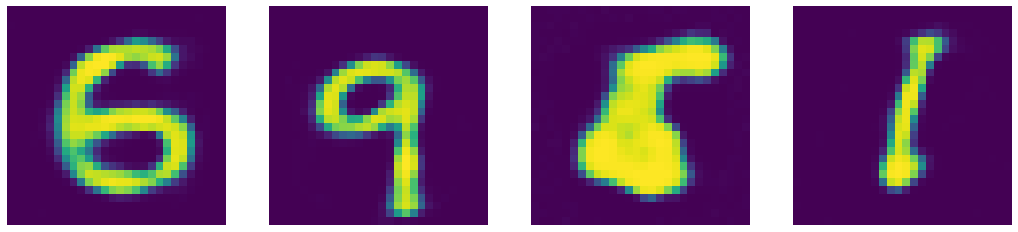

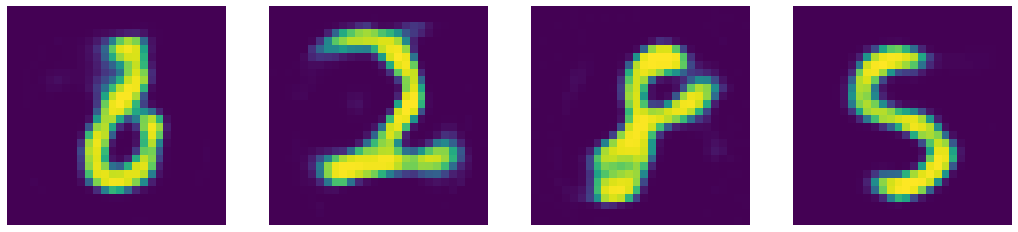

In [ ]:
num_epochs = 20
# do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        # noise = do(torch.ones(img.shape)).to(device)
        # img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = model(img)  # feed <img> (for std AE) or <img_bad> (for denoising AE)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

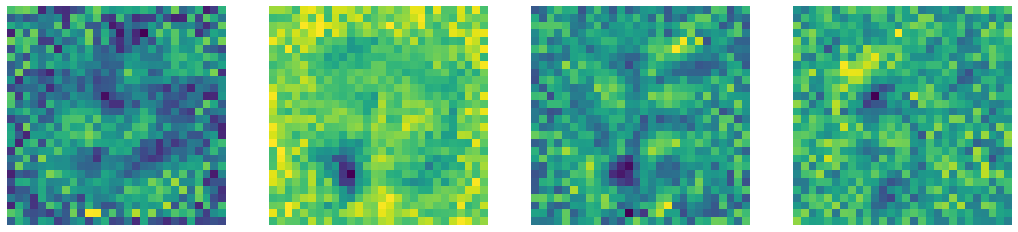

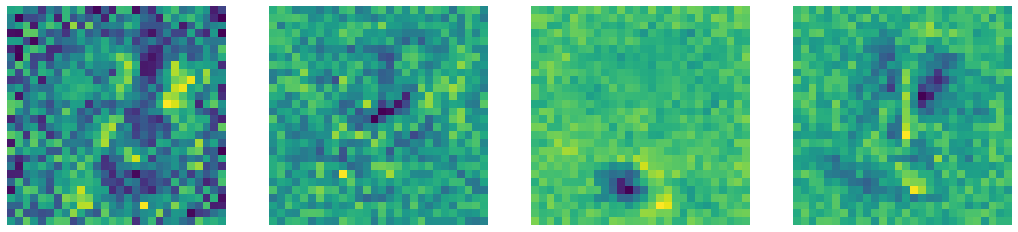

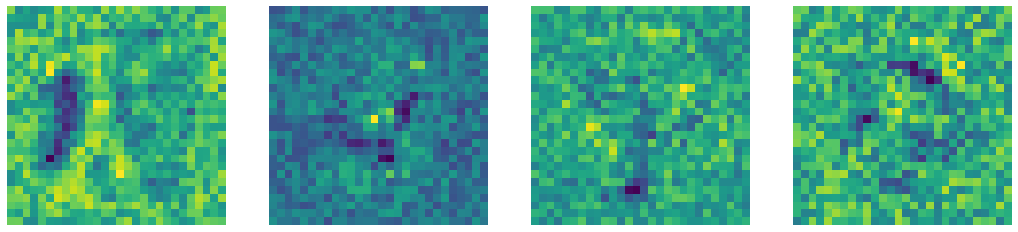

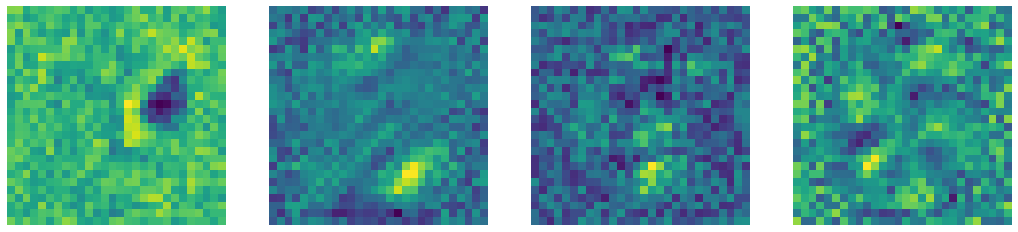

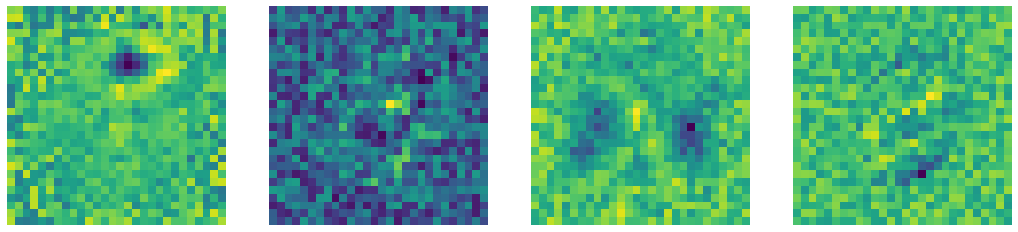

In [ ]:
display_images(None, model.encoder[0].weight, 5)

#ON remarque l'ajout d'autre couches ameliore la performance de l'autoEncoder et les images devient plus claire

PART2. Convolutions Neural Networks

1. Import the librariries and set the parameters

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy


def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)


def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)

set_default()

# function to count number of parameters
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


2. Load the Dataset (MNIST) using PyTorch DataLoader utilities and visualize some images :


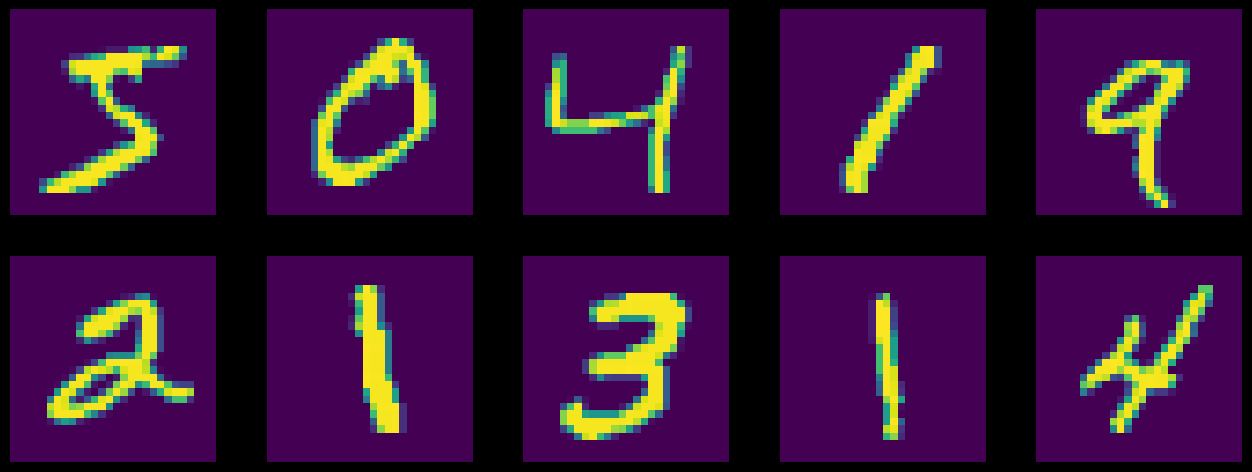

In [ ]:

input_size  = 28*28   # images are 28x28 pixels
output_size = 10      # there are 10 classes

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=1000, shuffle=True)

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off');



3. Create the model classes




In [ ]:
class FC2Layer(nn.Module):
    def __init__(self, input_size, n_hidden, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)
    
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.fc1 = nn.Linear(n_feature*4*4, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

4. Run on a GPU: device string

Switching between CPU and GPU in PyTorch is controlled via a device string, which will seemlessly determine whether GPU is available, falling back to CPU if not:

In [ ]:
accuracy_list = []
loss()
def train(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)

    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

5. Train a small fully-connected network

In [ ]:
n_hidden = 8 # number of hidden units

model_fnn = FC2Layer(input_size, n_hidden, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 1):
    train(epoch, model_fnn)
    test(model_fnn)

Number of parameters: 6442
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.338451
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.282466
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.896851
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.865997
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.572599
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.502341
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.312620
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.357757
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.354109
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.484721

Test set: Average loss: 0.3845, Accuracy: 8831/10000 (88%)



6. Train a ConvNet with the same number of parameters

In [ ]:
# Training settings 
n_features = 6 # number of feature maps

model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

for epoch in range(0, 1):
    train(epoch, model_cnn)
    test(model_cnn)

Number of parameters: 6422
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.323408
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.983209
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.330598
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.342327
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.387151
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.414734
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.154940
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.177285
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.141970
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.234441

Test set: Average loss: 0.1650, Accuracy: 9500/10000 (95%)



7. Changes the parameters of the model.



In [ ]:
 class FC2Layer(nn.Module):
    def __init__(self, input_size, n_hidden, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden , 50),
            nn.ReLU(),
            nn.Linear(50 , 20),
            nn.ReLU(),
            nn.Linear(20, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)
    
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, 12, kernel_size=5 )
        self.fc1 = nn.Linear(12*4*4, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 12*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
n_hidden = 100 # number of hidden units

model_fnn = FC2Layer(input_size, n_hidden, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 1):
    train(epoch, model_fnn)
    test(model_fnn)

Number of parameters: 84780
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.288620
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.157229
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.648361
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.869467
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.573316
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.573354
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.543781
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.381236
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.363178
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.285762

Test set: Average loss: 0.3402, Accuracy: 9003/10000 (90%)



In [ ]:
# Training settings 
n_features = 10 # number of feature maps

model = CNN(input_size, n_features, output_size)
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.6)
print('Number of parameters: {}'.format(get_n_params(model)))

for epoch in range(0, 1):
    train(epoch, model)
    test(model)

Number of parameters: 21840
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.311720
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.949355
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.441152
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.541438
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.219250
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.157407
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.205194
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.218732
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.068423
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.068008

Test set: Average loss: 0.1124, Accuracy: 9661/10000 (97%)



8. Analyze the results and the impact of these paremeters.

In [ ]:
On remarque pour le model CNN que laugmentation des feature maps ameliore sa performance et comme le montre l'accuracy pour les deux execution on a une augmentation de 